# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [129]:
# Installations
! pip install citipy
from citipy import citipy

import json
import requests
from api_keys import weather_api_key
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress


## Generate Cities List

In [3]:
# # Create random list of 500 city coordinates from around the world
# # Question asks for varying distance from equator, so will use random.uniform, which return values with equal distance from each other.
# # Can't use randit, as it wont return float numericals.
# # Use random.uniform instead, which will return float, and can set quantity
# lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
# long = np.random.uniform(low=-180.000, high=180.000, size=1500)
# # Output is 2 seperate arrays

# # Convert these 2 numpy arrays into a dataframe
# # lat_long_df = pd.DataFrame({"Latitude": lat, "Longtitude": long})

# # Need to create a list of 2 coordinates, 1 from lat and 1 from long.
# # 1st zip 2 arrays together
# lat_long = zip(lat, long)

# # 2nd convert the zip into a readable list of coordintes (i.e. list of 500, 2 numbers)
# coordinates = list(lat_long)

## ABOVE CODE MAY NOT WORK, WITH 


In [4]:
# Now that we have 500 random coordiantes, need for loop combined with citipy to obtain the 500 nearest cities to those coordinates

# cities = []

# for x in coordinates:
#     city2 = citipy.nearest_city(x[0], x[1]).city_name
    
#     # to avoid duplicating cities, create if statement to check list (cities)
#     if city2 not in cities:
#         cities.append(city2)

# # Check how many cities make it into list, need 500. 
# # Increased random generator to 1500, to append 500+ unique cities in list.
# print(len(cities))
# # print(cities)

### ABOVE CODE MAY NOT WORK, EVEN THOUGH 600+ CITIES ARE APPENDED. TRY DIFFERENT METHOD

cities = []
while len(cities) < 701:
    x = np.random.uniform(low=-90.000, high=90.000)
    y = np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(x,y).city_name
    if city not in cities:
        cities.append(city)
print(len(cities))
cities



701


['jamestown',
 'aguas formosas',
 'mogadishu',
 'ushuaia',
 'rikitea',
 'vaini',
 'longyearbyen',
 'ilulissat',
 'albany',
 'saskylakh',
 'mount gambier',
 'bredasdorp',
 'cape town',
 'ribeira grande',
 'ahipara',
 'santa maria del oro',
 'ponta do sol',
 'chuy',
 'firovo',
 'bengkulu',
 'busselton',
 'mitu',
 'impfondo',
 'dingzhou',
 'yellowknife',
 'amderma',
 'puerto ayora',
 'don sak',
 'khatanga',
 'karratha',
 'bolshoye selo',
 'taolanaro',
 'talnakh',
 'olavarria',
 'yumen',
 'surgut',
 'noshiro',
 'avarua',
 'manokwari',
 'alghero',
 'koumra',
 'qaanaaq',
 'luis correia',
 'thompson',
 'east london',
 'san patricio',
 'russell',
 'ileza',
 'deputatskiy',
 'alice springs',
 'barrow',
 'nikolskoye',
 'kapaa',
 'carnarvon',
 'barra patuca',
 'san carlos',
 'caucaia',
 'kumluca',
 'touros',
 'nanortalik',
 'illoqqortoormiut',
 'victor harbor',
 'hithadhoo',
 'faya',
 'bethel',
 'norman wells',
 'punta arenas',
 'cabo san lucas',
 'airai',
 'kodiak',
 'bintulu',
 'ocampo',
 'sitka

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Because retrieved names using citypy, need to use API request that searches on city name
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL, need to leave out city, so can loop later
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

# # Run trial API response (i.e. response1) to understand structure of repsonse
# city1 = "Melbourne"
# response1 = requests.get(query_url + city1).json()
# response1

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?&appid=adc09d289acd43b14400ca5380e522c7&units=Imperial&q='

In [34]:
# Required fields: 
# city name, lat, lng, max temp, humidity(%), cloudiness (%), wind speed (Mph), country, date

# Set lists, for responses required from API
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count = 0
set = 1

# Loop through all cities and append values coresponding to the above fields
for city in cities:
    try:
        # Get weather data
        response = requests.get(query_url + city).json()
        # print(response)
        # Get data from JSON response
        city_name.append(city)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        
        # No idea why a second counter ("set") has been created, but seems each set has
        # 49 records. So once count > 48 (i.e 49), reset count to 0, and set + 1.
        if count > 48:
            count = 1
            set = set + 1
        else: 
            count = count + 1
        print(f"Processing Record {count} of Set {set} | {city}")
    
    except:
        print(f"City not found. Skipping...")
        city_name.pop()         # Need to remove that city from city_name list.
        pass

print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | aguas formosas
Processing Record 3 of Set 1 | mogadishu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | mount gambier
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | ahipara
Processing Record 16 of Set 1 | santa maria del oro
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | firovo
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mitu
Processing Record 23 of Set 1 | impfondo
Processing Record 24 of Set 1 | dingzhou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Put weather data into dictionary:
weather_data_df = {"City": city_name,
                   "Lat": lat,
                   "Long": lng,
                   "Max Temp": max_temp,
                   "Humidity": humidity,
                   "Cloudiness": cloudiness,
                   "Wind Speed": wind_speed,
                   "Country": country,
                   "Date": date}

In [41]:
# Check if all list lengths are same. Otherwise, can't create a dataframe
print(len(city_name))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

654
654
654
654
654
654
654
654
654


In [38]:
# Create DF of dictionary
cityweather_df = pd.DataFrame(weather_data_df)

# Save DF to a csv file
cityweather_df.to_csv("Weather_Data.csv", encoding="utf-8", index=False)
cityweather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,67.71,92,0,4.03,US,1656032202
1,aguas formosas,-17.0822,-40.9358,64.36,94,6,1.10,BR,1656032203
2,mogadishu,2.0371,45.3438,77.36,78,93,17.31,SO,1656032205
3,ushuaia,-54.8000,-68.3000,38.86,81,75,16.11,AR,1656032206
4,rikitea,-23.1203,-134.9692,75.78,78,5,17.74,PF,1656032207


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
# Check max for humidity column
cityweather_df["Humidity"].describe()

# There are no cities with humidity, greater than 100. There are cities with humidity equal to 100.

# lessthan100hum_cityweather_df = cityweather_df[(cityweather_df["Humidity"] < 100 )]
# lessthan100hum_cityweather_df.head()

count    654.000000
mean      70.206422
std       21.917118
min        1.000000
25%       57.000000
50%       75.500000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [17]:
#  Get the indices of cities that have humidity over 100%.
# Here's code, but from previous code, we know there are no cities with humidity > 100.
hundredplushum_cityweaither_df = cityweather_df[cityweather_df["Humidity"] < 100]

Int64Index([], dtype='int64')

In [111]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Identify outliers in humidity data.
# Call humidity column, convert this series to a list, so can sort, to calculate outliers.
hum_list = cityweather_df.Humidity.values.tolist()
hum_list.sort()

humidities = cityweather_df.Humidity

# Calc quartiles, iqr, and outliers
quartiles = humidities.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Any humidity value < {lower_bound}, is an outlier. As min value is 1, there are a few outliers, to manage")
print(F"Any humidity value > {upper_bound}, is an outlier. As max value is 100, no upperbound outliers.")

# Create df of outliers (i.e. humidity values < 10.5)
lowerbound_outliers = cityweather_df[cityweather_df["Humidity"] < 10.5]
print(f"Lowerbound outliers:")
print(lowerbound_outliers)

# Retrieve index of lowerbound outliers, as a list. Used in .drop code below.
lowerbound_outliers.index.values
print(f"Index of outliers, for next code: {lowerbound_outliers.index.values}")


# join on index makes sense, hence use .join
joined_df = cityweather_df.join(lowerbound_outliers, lsuffix="_all", rsuffix="_outliers")

# Drop the rows (on index), where the join happened, as these are outliers to be excluded.
# Axis=0 means dropping rows.
clean_city_data_1 = joined_df.drop(labels=[190, 359, 364, 480], axis=0, inplace=False)
print(f"Dropping, returns {len(clean_city_data_1)} row, down 4, from 654. Expected.")

# Keep columns excluding joined (right)
clean_city_data_2 = clean_city_data_1[["City_all",'Lat_all', 'Long_all', 
                                     'Max Temp_all', 'Humidity_all', 'Cloudiness_all',
                                     'Wind Speed_all', 'Country_all', 'Date_all' ]]
clean_city_data_2

Any humidity value < 10.5, is an outlier. As min value is 1, there are a few outliers, to manage
Any humidity value > 134.5, is an outlier. As max value is 100, no upperbound outliers.
Lowerbound outliers:
        City      Lat     Long  Max Temp  Humidity  Cloudiness  Wind Speed  \
190    tabas  33.5959  56.9244     87.82         9           0        8.16   
359    ravar  31.2656  56.8055     84.43        10           0        7.36   
364     hami  42.8000  93.4500     94.39         7         100        9.08   
480  cayenne   4.9333 -52.3333     77.09         1          75        0.00   

    Country        Date  
190      IR  1656032432  
359      IR  1656032636  
364      CN  1656032642  
480      GF  1656032623  
Index of outliers, for next code: [190 359 364 480]
Dropping, returns 650 row, down 4, from 654. Expected.


,City_all,Lat_all,Long_all,Max Temp_all,Humidity_all,Cloudiness_all,Wind Speed_all,Country_all,Date_all
0,jamestown,42.0970,-79.2353,67.71,92,0,4.03,US,1656032202
1,aguas formosas,-17.0822,-40.9358,64.36,94,6,1.10,BR,1656032203
2,mogadishu,2.0371,45.3438,77.36,78,93,17.31,SO,1656032205
3,ushuaia,-54.8000,-68.3000,38.86,81,75,16.11,AR,1656032206
4,rikitea,-23.1203,-134.9692,75.78,78,5,17.74,PF,1656032207
...,...,...,...,...,...,...,...,...,...
649,huayucachi,-12.1333,-75.2333,50.18,79,87,3.87,PE,1656032968
650,gorontalo,0.5412,123.0595,83.80,74,19,1.43,ID,1656032969
651,decatur,39.8403,-88.9548,82.15,50,0,6.91,US,1656032766
652,mehamn,71.0357,27.8492,48.11,87,40,2.30,NO,1656032971


In [112]:
# Rename columns back to original from join left suffix
clean_city_data = clean_city_data_2.rename(columns={"City_all":"City", "Lat_all":"Lat", "Long_all":"Long",
                                    "Max Temp_all":"Max Temp", "Humidity_all":"Humidity",
                                    "Cloudiness_all":"Cloudiness",	"Wind Speed_all":"Wind Speed",
                                    "Country_all":"Country", "Date_all":"Date"})
clean_city_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,67.71,92,0,4.03,US,1656032202
1,aguas formosas,-17.0822,-40.9358,64.36,94,6,1.10,BR,1656032203
2,mogadishu,2.0371,45.3438,77.36,78,93,17.31,SO,1656032205
3,ushuaia,-54.8000,-68.3000,38.86,81,75,16.11,AR,1656032206
4,rikitea,-23.1203,-134.9692,75.78,78,5,17.74,PF,1656032207
...,...,...,...,...,...,...,...,...,...
649,huayucachi,-12.1333,-75.2333,50.18,79,87,3.87,PE,1656032968
650,gorontalo,0.5412,123.0595,83.80,74,19,1.43,ID,1656032969
651,decatur,39.8403,-88.9548,82.15,50,0,6.91,US,1656032766
652,mehamn,71.0357,27.8492,48.11,87,40,2.30,NO,1656032971


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

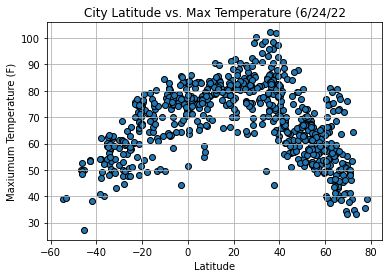

In [115]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Max Temperature (6/24/22")
plt.xlabel("Latitude")
plt.ylabel("Maxiumum Temperature (F)")
plt.grid(True)
plt.savefig("Images/City_Lat_Temp.png")

In [162]:
### Latitude vs Max Temperature plot shows max temperature around 40 degrees latitude. If you were to seperate the plot in 2 at that latitude point, there appears to be a positively correlated relationship for less than 40 degrees latitude, and negatively correlated relationship for greater than 40 degrees latitude.
### If would appear this 40 degrees latitude is some inflection point. Would interesting to investigate further.

## Latitude vs. Humidity Plot

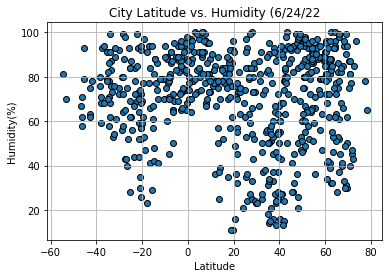

In [116]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Humidity (6/24/22")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("Images/City_Lat_Humidity.png")

In [ ]:
### Latitude vs Humidity plot seems to mostly spread out with no great relationship perceptible.
### There appears to be clustering around 0 degrees latitude and 60 degrees latitude.

## Latitude vs. Cloudiness Plot

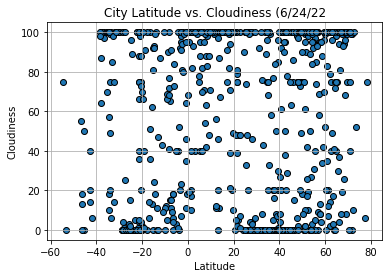

In [117]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Cloudiness (6/24/22")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("Images/City_Lat_Cloudinessy.png")

In [ ]:
### Latitude vs Cloudiness plot, doesn't seem to have any perseptible relationship.
### Of note, there appears to be clustering of cloudiness at 100% and 0%, which suggests many cities either have no cloudiness or completely cloudy conditions.
### Across all latitudes.

## Latitude vs. Wind Speed Plot

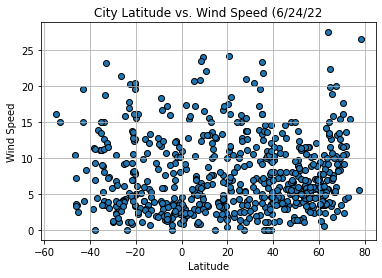

In [118]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolor="black", marker="o", label="Cities")
plt.title("City Latitude vs. Wind Speed (6/24/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("Images/City_Lat_WindSpeed.png")

In [ ]:
### Lat vs Wind Speed plot shows a majority of windspeed readings occur within 0-15 units, with some clustering around 30-70 Latitude.

## Linear Regression

In [147]:
def linear_regression(x_value,y_value,locx,locy,y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress = x_value * slope + intercept
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress, "r-")
    plt.annotate(line_eq, (locx, locy), fontsize =11, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()
    print(f"The r-value is:{rvalue}")    

In [142]:
# Create seperate dataframes for various hemispheres
northernhem_df = clean_city_data.loc[clean_city_data["Lat"] > 0]
southernhem_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.6404208456948645


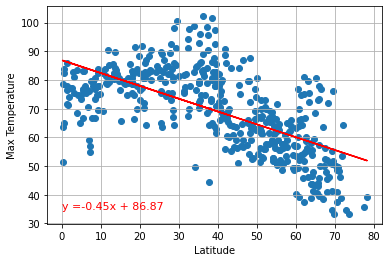

In [148]:
x_value = northernhem_df["Lat"]
y_value = northernhem_df["Max Temp"]

locx = 0
locy = 35

y_label = "Max Temperature"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.7281435305563367


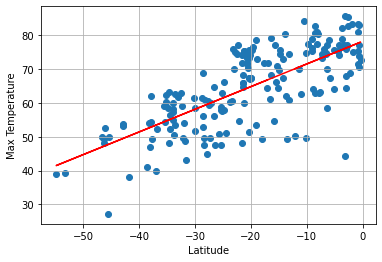

In [154]:
x_value = southernhem_df["Lat"]
y_value = southernhem_df["Max Temp"]

locx = -60
locy = 90

y_label = "Max Temperature"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:-0.031113455844787533


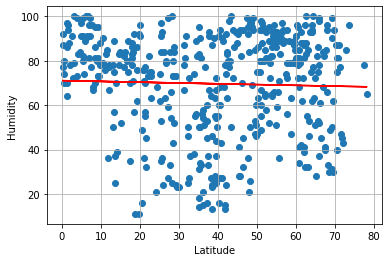

In [153]:
x_value = northernhem_df["Lat"]
y_value = northernhem_df["Humidity"]

locx = 55
locy = 5

y_label = "Humidity"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:-0.031113455844787533


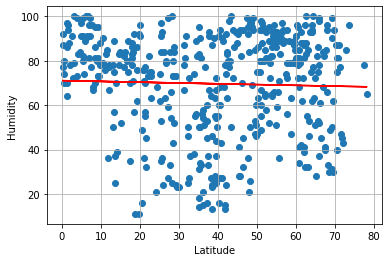

In [157]:
x_value = northernhem_df["Lat"]
y_value = northernhem_df["Humidity"]

locx = -60
locy = 45

y_label = "Humidity"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


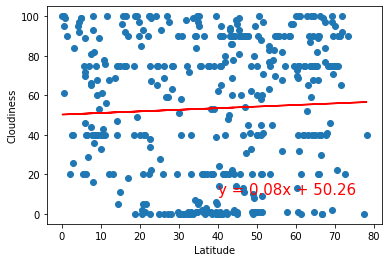

In [29]:
x_value = northernhem_df["Lat"]
y_value = northernhem_df["Cloudiness"]

locx = 60
locy = 10

y_label = "Cloudiness"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.024761386802913992


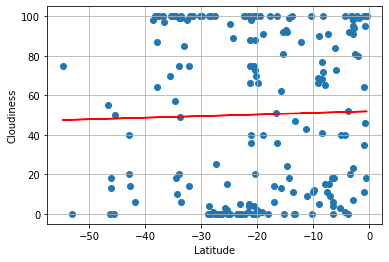

In [159]:
x_value = southernhem_df["Lat"]
y_value = southernhem_df["Cloudiness"]

locx = -60
locy = 60

y_label = "Cloudiness"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.022458904930080594


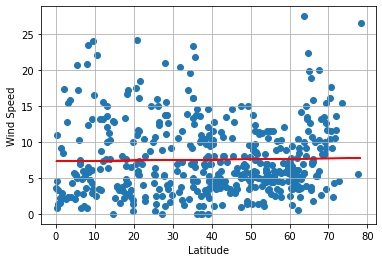

In [160]:
x_value = northernhem_df["Lat"]
y_value = northernhem_df["Wind Speed"]

locx = 0
locy = 30

y_label = "Wind Speed"
linear_regression(x_value,y_value,locx,locy,y_label)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.1780112514201588


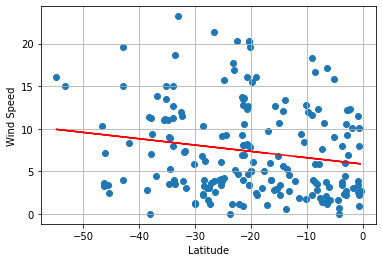

In [161]:
x_value = southernhem_df["Lat"]
y_value = southernhem_df["Wind Speed"]

locx = -60
locy = 40

y_label = "Wind Speed"
linear_regression(x_value,y_value,locx,locy,y_label)